In [1]:
#import dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#read in data frame from database 
data_df = pd.read_csv("Resources/Clean_Data.csv")
vaccine_df = pd.read_csv("Resources/Total_Vaccine_Distro.csv")
combined_df = pd.read_csv("Resources/Combined_data.csv")
weekly_deaths = pd.read_csv("Resources/Weekly_Deaths_no_vaccines.csv")

In [3]:
vaccine_df.dtypes

Week             object
Vaccinations    float64
dtype: object

In [4]:
combined_df

,week,race,covid_deaths,vaccinations
0,2021-01-02,Hispanic,67,2943525
1,2021-01-02,Non-Hispanic American Indian or Alaska Native,0,2943525
2,2021-01-02,Non-Hispanic Asian,11,2943525
3,2021-01-02,Non-Hispanic Black,61,2943525
4,2021-01-02,Non-Hispanic More than one race,0,2943525
...,...,...,...,...
100,2021-04-17,Non-Hispanic Asian,0,7611440
101,2021-04-17,Non-Hispanic Black,0,7611440
102,2021-04-17,Non-Hispanic More than one race,0,7611440
103,2021-04-17,Non-Hispanic Native Hawaiian or Other Pacific ...,0,7611440


In [7]:
weekly_deaths

,sum,race,week
0,0,Non-Hispanic White,2020-01-04
1,0,Non-Hispanic American Indian or Alaska Native,2020-01-04
2,0,Non-Hispanic More than one race,2020-01-04
3,0,Non-Hispanic Asian,2020-01-04
4,0,Non-Hispanic Native Hawaiian or Other Pacific ...,2020-01-04
...,...,...,...
471,36,Non-Hispanic Black,2021-04-17
472,0,Non-Hispanic More than one race,2021-04-17
473,0,Non-Hispanic Asian,2021-04-17
474,630,Non-Hispanic White,2021-04-17


In [8]:
data_df.dtypes

Week            object
HHS_Region       int64
Race            object
COVID_Deaths     int64
dtype: object

In [17]:
combined_df_test = pd.get_dummies(combined_df, columns=["race"])
combined_df_test

,week,covid_deaths,vaccinations,race_Hispanic,race_Non-Hispanic American Indian or Alaska Native,race_Non-Hispanic Asian,race_Non-Hispanic Black,race_Non-Hispanic More than one race,race_Non-Hispanic Native Hawaiian or Other Pacific Islander,race_Non-Hispanic White
0,2021-01-02,67,2943525,1,0,0,0,0,0,0
1,2021-01-02,0,2943525,0,1,0,0,0,0,0
2,2021-01-02,11,2943525,0,0,1,0,0,0,0
3,2021-01-02,61,2943525,0,0,0,1,0,0,0
4,2021-01-02,0,2943525,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
100,2021-04-17,0,7611440,0,0,1,0,0,0,0
101,2021-04-17,0,7611440,0,0,0,1,0,0,0
102,2021-04-17,0,7611440,0,0,0,0,1,0,0
103,2021-04-17,0,7611440,0,0,0,0,0,1,0


In [6]:
data_df

,Unnamed: 0,Week,HHS_Region,Race,COVID_Deaths
0,4896,2020-01-04,1,Hispanic,0.0
1,4897,2020-01-04,1,Hispanic,0.0
2,4898,2020-01-04,1,Hispanic,0.0
3,4899,2020-01-04,1,Hispanic,0.0
4,4900,2020-01-04,1,Hispanic,0.0
...,...,...,...,...,...
42835,53842,2021-04-17,10,Non-Hispanic White,0.0
42836,53843,2021-04-17,10,Non-Hispanic White,NaN
42837,53844,2021-04-17,10,Non-Hispanic White,NaN
42838,53845,2021-04-17,10,Non-Hispanic White,NaN


In [7]:
#get the total deaths in week
weekly_deaths = data_df.groupby(["Week"]).sum()["COVID_Deaths"]
weekly_deaths

Week
2020-01-04       0.0
2020-01-11       0.0
2020-01-18       0.0
2020-01-25       0.0
2020-02-01       0.0
               ...  
2021-03-20    3807.0
2021-03-27    3151.0
2021-04-03    2394.0
2021-04-10    1922.0
2021-04-17     761.0
Name: COVID_Deaths, Length: 68, dtype: float64

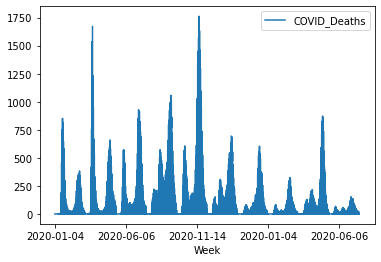

In [9]:
data_df.plot.line(x="Week", y="COVID_Deaths")

plt.show()

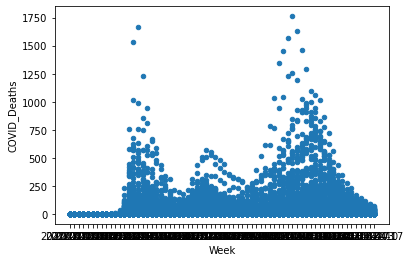

In [10]:
data_df.plot.scatter(x="Week", y="COVID_Deaths")
plt.show()

<AxesSubplot:xlabel='week'>

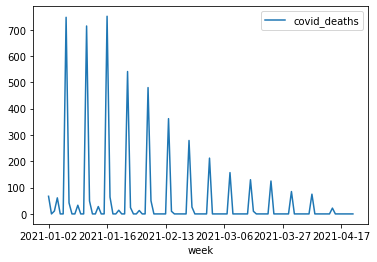

In [8]:
combined_df.plot.line(x="week", y="covid_deaths")

In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

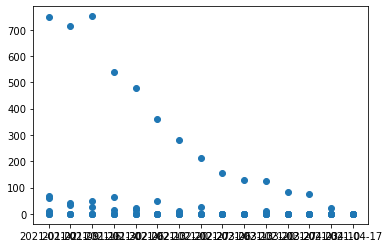

In [14]:
plt.scatter(combined_df.week, combined_df.covid_deaths)
plt.show()

In [19]:
X = combined_df_test[["race_Non-Hispanic American Indian or Alaska Native", "race_Non-Hispanic Asian", "race_Non-Hispanic Black", "race_Non-Hispanic More than one race", "race_Non-Hispanic Native Hawaiian or Other Pacific Islander", "race_Non-Hispanic White", "vaccinations"]]
Y = combined_df_test["covid_deaths"]

In [20]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 73.59041149516199
Coefficients: 
 [-2.28000000e+01 -2.20666667e+01 -1.28666667e+01 -2.28000000e+01
 -2.28000000e+01  2.89200000e+02 -1.44831536e-05]
                            OLS Regression Results                            
Dep. Variable:           covid_deaths   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     18.45
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.04e-15
Time:                        20:14:29   Log-Likelihood:                -628.02
No. Observations:                 105   AIC:                             1272.
Df Residuals:                      97   BIC:                             1293.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                